## О задании
В этом задании вы будете предсказывать один из параметров человека (рост, вес, возраст).

Работать мы будем с датасетом человеческих параметров [Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset).

### Формат сдачи
Данное задание сдаётся через [эту гугл форму](https://forms.gle/YdvLRGWAsNaNvQvs7). Не забудьте открыть доступ по ссылке к файлу (справа сверху "Поделиться" или "Share")

## Приступим

Сделаем импорты

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузите данные из файла `bodyfat.csv` и сохраните в переменную `df`. Выведите первые 5 строк, число строк и столбцов

In [7]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

df = pd.read_csv('./resources/bodyfat.csv')
display(df.head(5))
df.shape

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


(252, 15)

### Первичный анализ

Ознакомиться со значениями признаков вы можете [по ссылке](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset)

Посмотрите, есть ли пропуски в данных. Если есть, то избавьтесь от них. Вам может понадобиться метод [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [51]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯
# Загружал с Kaggle, там нет NA, на колабе были
print(f'Есть ли NA: {df.isna().values.any()}')

Есть ли NA: False


Построим карту корреляций

In [9]:
df.corr().style.background_gradient('coolwarm').format('{:.2g}'.format)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1,-0.99,-0.28,-0.59,0.098,-0.47,-0.68,-0.8,-0.61,-0.55,-0.5,-0.26,-0.49,-0.35,-0.33
BodyFat,-0.99,1,0.29,0.61,-0.089,0.49,0.7,0.81,0.63,0.56,0.51,0.27,0.49,0.36,0.35
Age,-0.28,0.29,1,-0.013,-0.17,0.11,0.18,0.23,-0.05,-0.2,0.018,-0.11,-0.041,-0.085,0.21
Weight,-0.59,0.61,-0.013,1,0.31,0.83,0.89,0.89,0.94,0.87,0.85,0.61,0.8,0.63,0.73
Height,0.098,-0.089,-0.17,0.31,1,0.25,0.13,0.088,0.17,0.15,0.29,0.26,0.21,0.23,0.32
Neck,-0.47,0.49,0.11,0.83,0.25,1,0.78,0.75,0.73,0.7,0.67,0.48,0.73,0.62,0.74
Chest,-0.68,0.7,0.18,0.89,0.13,0.78,1,0.92,0.83,0.73,0.72,0.48,0.73,0.58,0.66
Abdomen,-0.8,0.81,0.23,0.89,0.088,0.75,0.92,1,0.87,0.77,0.74,0.45,0.68,0.5,0.62
Hip,-0.61,0.63,-0.05,0.94,0.17,0.73,0.83,0.87,1,0.9,0.82,0.56,0.74,0.55,0.63
Thigh,-0.55,0.56,-0.2,0.87,0.15,0.7,0.73,0.77,0.9,1,0.8,0.54,0.76,0.57,0.56


**Вопрос.** Глядя на карту корреляций, можете ли вы выявить линейно зависимые признаки?

<u>**Ответ**</u>: да, можно сказать о положительной линейной зависимости в клетках с коэффициентами близкими к 1, и отрицательной в клетках с коэффициентами корреляции близкими к -1 

### Определение целевой и объясняющих переменных

Выберите величину, которую вы собираетесь предсказывать. На выбор: **возраст**, **рост** или **вес**. Укажите это снизу:

### Я предсказываю <u>**вес**</u>

Отберите признаки, по которым вы будете предсказывать целевую переменную (список из названий столбцов) и запишите их в переменную `cols`.

**Вопрос.** По какому критерию нужно отбирать объясняющие переменные (переменные, по которым предсказываем целевую)

<u>**Ответ**</u>: так как мы обучаем линейную модель и у нас нет цели в точной интерпретации коэффициентов, то можем выбирать на основе большого абсолютного коэффициента корреляции. Однако, следует иметь ввиду, что если нам нужны BLUE оценки, то нужно проверять предпосылки Гаусса-Маркова и знать предметную область. Например, возможно, что некоторые признаки признаки формируются на основе других $\implies$ может возникнуть мультиколлинеарность.

Дополнительно, после построения модели можно посмотреть зависимость ошибки от целевой переменной, чтобы посмотреть хорошо ли мы выбрали признаки. Если она будет большой, значит мы выбрали не все признаки, которые объясняют y. 

**(*) Дополнительно.** Постройте графики рассеяния между объясняющими переменными и целевой переменной. Наблюдаются ли линейные зависимости?

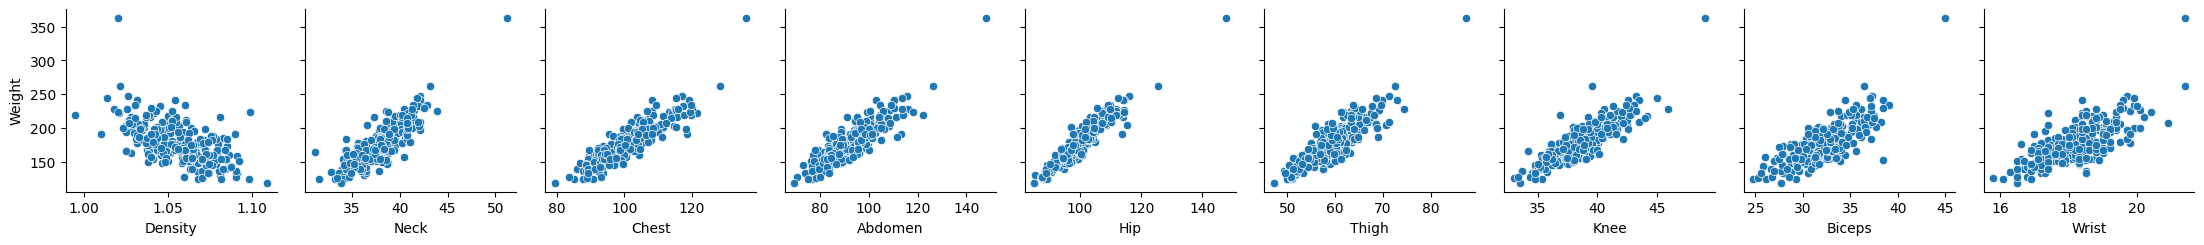

In [56]:
cols = ['Density', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Biceps', 'Wrist']
g = sns.PairGrid(data=df, x_vars=cols, y_vars='Weight')
g.map(sns.scatterplot);

<u>**Ответ**</u>: наблюдаются

In [57]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

cols = ['Density', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Biceps', 'Wrist'] # список из столбцов - объясняющих переменных

Запишите в переменную `y` столбец-признак, который предсказываете, а в переменную `X` признаки, по которым предсказываете

In [58]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

X, y = df[cols], df['Weight']

### Разбиение данных

Разбейте данные на тренировочную и тестовую части. На тестовую выделите 20% выборки, можно зафиксировать `random_state`

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1337)

### Масштабирование признаков

Отмасштабируйте признаки с помощью [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Не забудьте, что scaler "обучается" только на тренировочных признаках

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Построение модели линейной регрессии

Обучите модель [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) на тренировочных данных и сделайте предсказание

In [17]:
from sklearn.linear_model import Ridge

In [18]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯

linreg = Ridge().fit(X_train, y_train) # здесь будет ваша модель
y_pred_train = linreg.predict(X_train) # здесь будут предсказания на тренировочных данных
y_pred_test = linreg.predict(X_test) # здесь будут предсказания на тестовых данных

В качестве метрики возьмём **RMSE**. Оцените качество по этой метрике на тренировочной и тестовой выборках. Для вычисления метрики можете воспользоваться функцией **rmse_score**

In [19]:
def rmse_score(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

In [20]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯

print('Качество на тренировочной выборке:', rmse_score(y_train, y_pred_train))
print('Качество на тестовой выборке:', rmse_score(y_test, y_pred_test))

# Построим константную модель
constant_forecast_train = np.repeat(y_train.mean(), y_train.shape[0])
# Считаем, что никогда не видели test, используем значение из train
constant_forecast_test = np.repeat(y_train.mean(), y_test.shape[0])
print('Качество константного на тренировочной выборке:', rmse_score(y_train, constant_forecast_train))
print('Качество константного на тестовой выборке:', rmse_score(y_test, constant_forecast_test))

Качество на тренировочной выборке: 5.92263451970558
Качество на тестовой выборке: 6.498686263450881
Качество константного на тренировочной выборке: 30.01965377683209
Качество константного на тестовой выборке: 26.53954607171962


**(*) Дополнительно.** Какое качество будет у константной модели по выбранной метрике? Лучше ли предсказания нашей модели?

<u>**Ответ**</u>: Лучше

### Подбор гиперпараметров

Попробуйте подобрать лучший коэффициент регуляризации с помощью кросс-валидации. Для этого можно воспользоваться готовым классом [`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

Основные моменты:
* Запишите список значений коэффициента регуляризацию в переменную `alphas`
* Не забудьте указать параметр `scoring` равным "neg_root_mean_squared_error"

In [21]:
from sklearn.linear_model import RidgeCV

In [44]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯

alphas = [0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10] # можно добавить другие перебираемые значения
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_root_mean_squared_error', cv=2) # модель со встроенной кросс-валидацией
ridge_cv.fit(X_train, y_train)


RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10], cv=2,
        scoring='neg_root_mean_squared_error')

**Вопрос.** Какое получилось лучшее значений гиперпараметра?

In [45]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯

print('Лучшее значение гиперпараметра:', ridge_cv.alpha_)

Лучшее значение гиперпараметра: 3.0


Обучите модель `Ridge` с лучшим значением гиперпараметра на тренировочных данных и оцените качество модели

In [50]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯

linreg = Ridge(alpha=3).fit(X_train, y_train) # здесь модель с лучшим значением коэффициента регуляризации
y_pred_train = linreg.predict(X_train) # здесь будут предсказания на тренировочных данных
y_pred_test = linreg.predict(X_test) # здесь будут предсказания на тестовых данных

print('Качество на тренировочной выборке:', rmse_score(y_train, y_pred_train))
print('Качество на тестовой выборке:', rmse_score(y_test, y_pred_test))

Качество на тренировочной выборке: 5.934604030896677
Качество на тестовой выборке: 6.462869003869452


**Вопрос.** Улучшилось ли качество модели после подбора гиперпараметра?

<u>**Ответ**</u>: Да

**(*) Дополнительно.** Можете поварьировать число сплитов (параметр `cv`). Отразилось ли это на лучшем значении гиперпараметра/качестве модели?

<u>**Ответ**</u>: Вариант с 2-мя сплитами дал параметр 3, что улучшило качество модели,
но говорить о том, что результат значим можно только проводя статистические тесты.

### Выводы


**Вопрос.** Напишите выводы о проделанной работе: что было сделано, какие результаты получены?

<u>**Ответ**</u>: была проведена работа по обучению моделей множественной линейной регрессии для предсказания веса. После отбора признаков по матрице корреляций и их масштабированию, была обучена модель без использования регуляризации. Она показала результат, лучший чем бейзлайн модель (константный прогноз). Добавление L2 регуляризации дополнительно улучшает качество прогноза $RMSE_{RIDGE} = 6.46 < RMSE_{default} = 6.49 < RMSE{baseline} = 26.54$. 

### (*) Дополнительно

**(*) Дополнительно.** Обучите модель [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), попробуйте также подобрать коэффициенты регуляризации (вам может пригодиться [`LassoCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)) и оценить модель с лучшим гиперпараметром. Сравните получившиеся модели Ridge и Lasso

<u>**Ответ**</u>: _ _ _ _ _ _ _ _ _ _ _ _

**(*) Дополнительно** Для улучшения качества модели может помочь более качественная предобработка данных. Попробуйте:
1. Вместо выбрасывания строк с пустыми значениями попробуйте заполнить их средним (или медианой) по столбцу. Помните, что среднее считается только по тренировочной выборке
2. Попробуйте выявить выбросы в данных. Избавьтесь от них или заполните адекватным значением
3. Попробуйте другой способ масштабирования (например, [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)) или не масштабировать данные
4. Посмотрите на распределение целевой переменной. Попробуйте привести его к нормальному распределению (логарифмирование целевой переменной, возведение в степень,..). При подсчёте метрики придётся применить обратное преобразование целевой переменной

Напишите результаты экспериментов:

<u>**Ответ**</u>: _ _ _ _ _ _ _ _ _ _ _ _